<a href="https://colab.research.google.com/github/alenadedova/Linguistics2024/blob/main/Copy_of_workbook_distributional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Курс "Компьютерная лингвистика" | НИУ ВШЭ Санкт-Петербург
(c) В.И. Фирсанова
```

# Практика: Введение в дистрибутивную семантику и знакомство с Google Colab

## Welcome to Google Colab

In [ ]:
print ('Hello world')

Hello world


**Jupyter-ноутбук — интерактивная среда разработки**

Свойства Jupyter

* работа в ячейках
  * мгновенное отображение результата работы фрагментов кода
  * можно разбить выполнение кода на части
  * ячейки можно запускать в произвольном порядке

* код и текст
  * Jupyter поддерживает 2 типа ячеек - текстовые и кодовые
  * всю вашу работу можно документировать в текстовых ячейках

* визуализация
  * табличных данных
  * графиков
  * \+ красивый вывод данных

* область применения
  * машинное обучение
  * дата саенс
  * большие данные
  * научные вычисления
  * документация

**Интерфейс Google Colab — разновидность Jupyter-ноутбука**

Основные отличия

* интеграция с внешними сервисами
  * GitHub (можно напрямую скачивать и загружать ноутбуки)
  * Google Drive (там можно хранить данные, модели; нужно подключить свой диск к ноутбуку)
  * NEW! генеративный ИИ может помочь вам с написанием кода

* аппаратный ускоритель
  * GPU / TPU используется для машинного обучения и других ресурсоёмких вычислений
  * бесплатный доступ / недорогая подписка
  * см. меню `Runtime` - `Change runtime type`

**Основы работы с интерфейсом Google Colab**

***Открыть файл***

Горячие клавиши: `Ctrl + O` или `Cmd + O`

Опции:

* загружаем файл *.ipynb с локального диска
* открываем файл *.ipynb с Google-диска
* открываем файл *.ipynb с GitHub (URL, поиск пользователя)
* открываем из GitHub с помощью кнопки `Open in Colab`

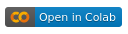

***Сохранить файл***

Горячие клавиши: сохранить на Google-диске `Ctrl + S` или `Cmd + S`

Возможности:

* сохранить копию в репозитории на GitHub (`File` - `Save a copy in GitHub`)
* сохранить GitHub Gist
* скачать *.ipynb (Jupyter-ноутбук)
* скачать *.py (скрипт на Python без деления на ячейки и текстовой информации)

***Внести изменения в файл***

Можно создать кодовую или текстовую ячейку.

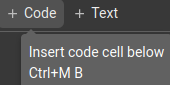

В кодовой ячейке можно ввести код на языке Python или команды shell.

Горячие клавиши:
- новая ячейка `Ctrl + M + B` или `Cmd + M + B`
- запустить ячейку `Shift + Enter`


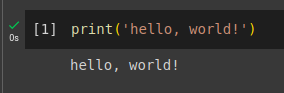

Ячейка содержит следующую информацию
- вывод данных
- время исполнения кода
- порядковый номер ячейки по ходу исполнения

In [ ]:
print('hello, world!')

hello, world!


Текстовые ячейки оформляются как Markdown.

См. [руководство по работе с Markdown](https://github.com/vifirsanova/compling/blob/main/markdown.md/).

Руководство можно использовать для оформления файла README.md в вашем репозитории на GitHub.

## Дистрибутивная семантика

[Efficient Estimation of Word Representations in
Vector Space (Mikolov et al., 2013)](https://arxiv.org/pdf/1301.3781.pdf)

### **Задача 1.** Обучаем эмбеддинги с Gensim

Что такое Gensim?

* библиотека Python с открытым исходным кодом
* области применения:
  * извлечение информации
  * обработка естественного языка
* задачи:
  * тематическое моделирование
  * индексирование документов
  * поиск сходства

При использовании любой библиотеки, нужно использовать ее [документацию](https://radimrehurek.com/gensim/index.html)

Загрузим корпус текстов Шекспира напрямую из GitHub с помощью команды shell `wget`

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-28 12:36:22--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-01-28 12:36:22 (22.0 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
# прописываем путь к файлу
file_path = 'input.txt'

# открываем файл для чтения ('r')
with open(file_path, 'r') as file:
    # записываем содержимое файла в переменную
    text_content = file.read()

# выведем на экран часть содержимого
text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

Pre-processing / предобработка с помощью регулярных выражений и токенизатора NLTK

In [ ]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^a-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

# выведем на экран часть обработанного текста
cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

In [ ]:
import nltk
nltk.download('punkt') # ресурс для токенизации
nltk.download('wordnet') # ресурс для лемматизации
nltk.download('stopwords') # ресурс для извлечения списка стоп-слов


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

# токенизация по словам
tokens = word_tokenize(cleaned_text)

# выведем на экран несколько токенов
tokens[:10]

['first',
 'citizen',
 'before',
 'we',
 'proceed',
 'any',
 'further',
 'hear',
 'me',
 'speak']

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# лемматизация: инициализация WordNetLemmatizer и извлечение лемм
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]

# загружаем стоп-слова
stop_words = set(stopwords.words('english'))

# удаляем стоп-слова
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# выведем на экран несколько токенов
filtered_tokens[:10]

['first',
 'citizen',
 'proceed',
 'hear',
 'speak',
 'speak',
 'speak',
 'first',
 'citizen',
 'resolved']

Обучение

`sentences` - итерируемый объект; список токенов либо список списков токенов (токенизированных предложений)

`vector_size` - размерность вектора

`window` - размер контекстного окна

`min_count` - если слово встречается реже, оно не попадает в нашу модель

`workers` - потоки (распараллеливание для ускорение работы)

In [ ]:
from gensim.models import Word2Vec

# задаем параметры нашей модели
model = Word2Vec(sentences=[filtered_tokens], vector_size=128, window=4, min_count=2, workers=4)

In [ ]:
# выведем результат обучения модели
model.wv['king']

array([-1.47392391e-03, -3.36096250e-03, -4.99589276e-03, -2.84712622e-03,
        3.53402505e-03, -2.89850798e-03,  6.61821710e-03,  1.11137622e-03,
       -5.65775204e-03,  7.46025611e-03,  6.06384920e-03,  4.18307167e-03,
       -5.31160226e-03,  4.53126710e-03,  3.08114826e-03,  4.19487990e-03,
        3.24838562e-03,  1.52365630e-03, -2.45546061e-03,  6.59931125e-03,
        7.61237508e-03,  2.98881833e-03, -2.23136158e-03, -1.84822857e-04,
        7.97928486e-04, -6.54331874e-03, -6.56652497e-03,  1.76763824e-05,
        9.14741599e-04, -4.50421404e-03, -3.77482129e-03, -5.80571173e-03,
        6.65223133e-03,  1.08055268e-04, -3.39857815e-03,  4.46118833e-03,
        7.22409412e-03, -3.22319847e-03,  6.34401059e-03,  4.31108195e-03,
        4.46148682e-03,  5.15109219e-04,  6.37670560e-03, -5.54287480e-03,
       -6.26850128e-03,  7.16381520e-03, -1.21544785e-04, -1.66233245e-03,
        3.46069876e-03, -3.22447647e-03,  2.22810032e-03,  5.58749726e-03,
        4.73893061e-03, -

### **Задача 2.** Считаем сходство

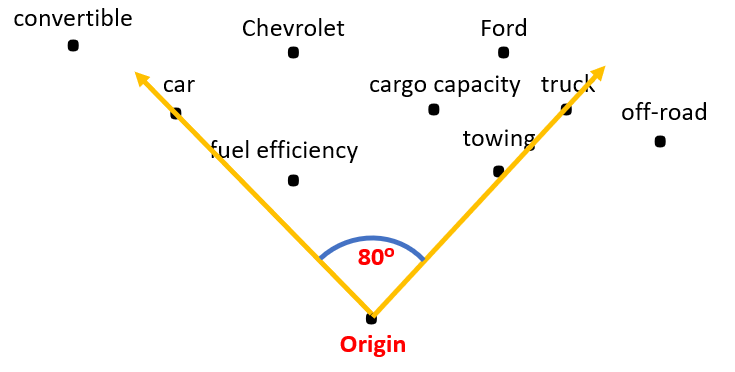

StandingFuture, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

In [ ]:
model.wv.most_similar(["king"])

[('cushions', 0.30574703216552734),
 ('stone', 0.28791218996047974),
 ('second', 0.2828894257545471),
 ('sworn', 0.27545595169067383),
 ('greyhound', 0.27049756050109863),
 ('discovery', 0.2689278721809387),
 ('testimony', 0.26321595907211304),
 ('budge', 0.259999543428421),
 ('ii', 0.2582401931285858),
 ('shining', 0.2564866840839386)]

In [ ]:
model.wv.most_similar(["prince"])

[('work', 0.32615214586257935),
 ('proclaims', 0.3105105459690094),
 ('powder', 0.2994292974472046),
 ('gone', 0.2899925112724304),
 ('named', 0.2886420786380768),
 ('posterity', 0.28631773591041565),
 ('little', 0.28378206491470337),
 ('twelve', 0.28013432025909424),
 ('merrily', 0.27833396196365356),
 ('dearer', 0.27749720215797424)]

In [ ]:
model.wv.similarity('king', 'queen')

-0.0038529262

In [ ]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'king'

### **Задача 3.** Визуализация

Важный этап подготовки данных к визуализации - сокращение размерности вектора.

Мы обучили вектора размером 100. Теперь нужно превратить их в 2D.

Для этого используют разные алгоритмы, мы воспользуемся PCA (principal component analysis), статистической моделью, которая приводит всю информацию о полученном контенте к виду матрицы меньшей размерности, например, к виду таблицы (двухмерный массив), удобной для построения графиков и эксплораторного анализа данных.

Чтобы понять, как работает PCA, можно почитать [этот блог](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

Создаем функцию для отрисовки графика с помощью PCA.

In [ ]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(6,6))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='r')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

Для визуализации давайте посмотрим, какие эпитеты Шекспир использует для описания королей и королев!

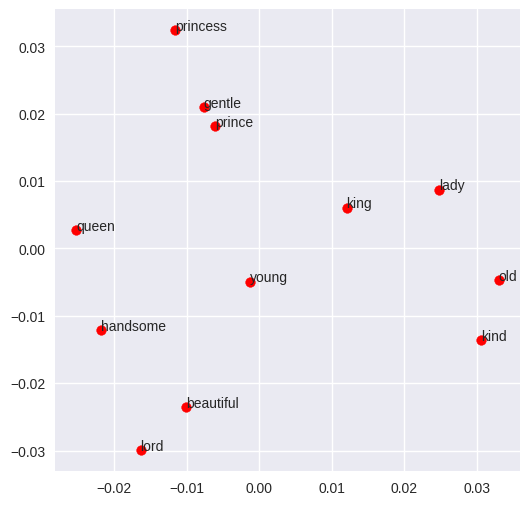

In [ ]:
pca_scatterplot(model, ['handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

## Домашнее задание

**Базовый уровень:**

* удалить стоп-слова в корпусе текстов Шескпира, лемматизировать корпус (достаточно выбрать что-то одно)
* заново обучить вектора
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках (можно просто перезапустить эти ячейки без изменений)
* представить выводы о проделанной работы: удалось ли вам обнаружить связи после удаления стоп-слов, лемматизации?

**Уверенный уровень:**

* обучить такую же модель Word2Vec на другом, более крупном корпусе
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках
* представить выводы о проделанной работы: удалось ли вам обнаружить какие-либо связи и отношения?

**Продвинутый уровень:**

* обучить FastText с помощью [туториала](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html)
* найти сходства и различия между отдельными векторами
* объяснить принцип работы FastText своими словами

**Опционально для любого уровня:**

* поиграть с визуализацией: поменять стиль, цвета графики
* выбрать другой набор слов для визуализации



**Выводы (базовый уровень):**
Были удалены стоп-слова и проведена лемматизация корпуса. При этом значительно изменились числовые значения сходств/различий между векторами. Например, из тройки "king", "queen", "prince" лишним оказался "king", а не "queen". Тем не менее, с помощью визуализации можно увидеть как близкие по мнению модели векторы ("prince", "gentle"), так и кардинально разные ("princess", "lord"), но в отличном от результатов работы с нелематизированным корпусом со стоп-словами соотношении.